In [2]:
import os
os.getcwd()
os.listdir()


['environment_setup.ipynb',
 'dataset_understanding.ipynb',
 'eda_analysis.ipynb']

In [3]:
import pandas as pd

df = pd.read_csv("../data/home_credit/application_train_working.csv")

df.shape


(307511, 122)

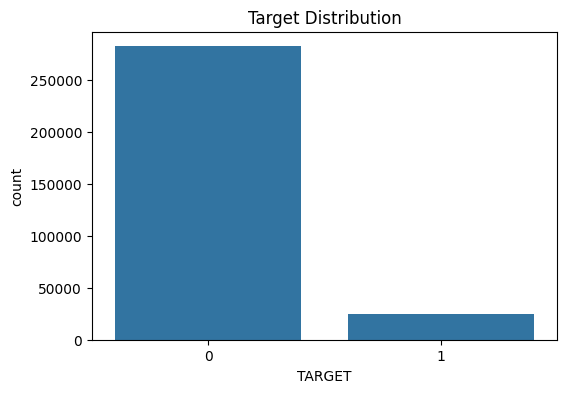

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(x="TARGET", data=df)
plt.title("Target Distribution")
plt.show()


In [5]:
df["TARGET"].value_counts(normalize=True)


TARGET
0    0.919271
1    0.080729
Name: proportion, dtype: float64

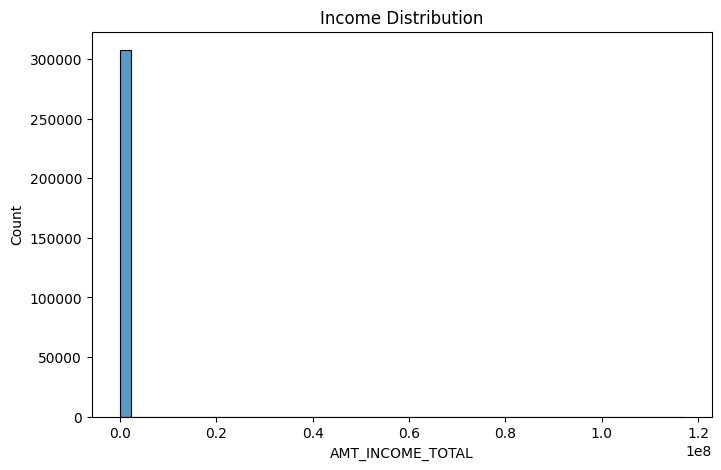

In [6]:
plt.figure(figsize=(8,5))
sns.histplot(df["AMT_INCOME_TOTAL"], bins=50)
plt.title("Income Distribution")
plt.show()


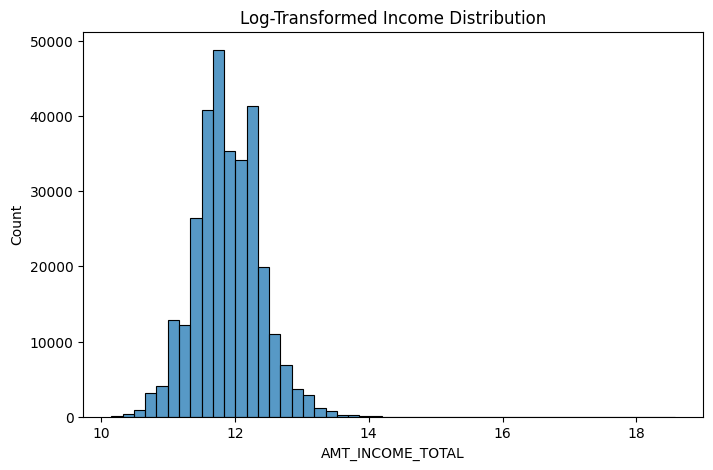

In [7]:
import numpy as np

plt.figure(figsize=(8,5))
sns.histplot(np.log1p(df["AMT_INCOME_TOTAL"]), bins=50)
plt.title("Log-Transformed Income Distribution")
plt.show()


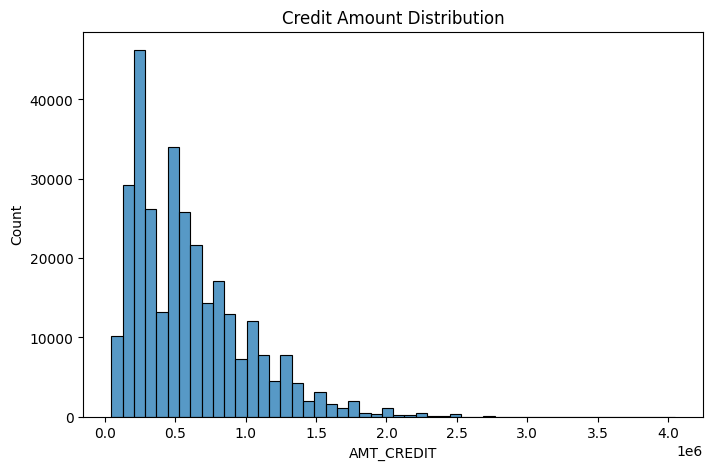

In [8]:
plt.figure(figsize=(8,5))
sns.histplot(df["AMT_CREDIT"], bins=50)
plt.title("Credit Amount Distribution")
plt.show()


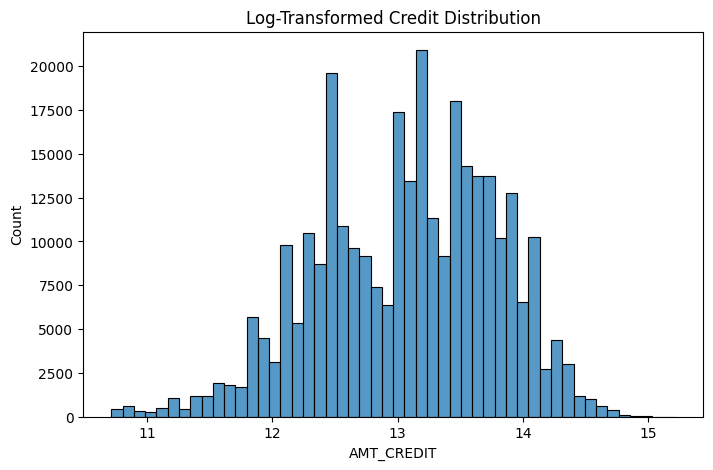

In [9]:
plt.figure(figsize=(8,5))
sns.histplot(np.log1p(df["AMT_CREDIT"]), bins=50)
plt.title("Log-Transformed Credit Distribution")
plt.show()


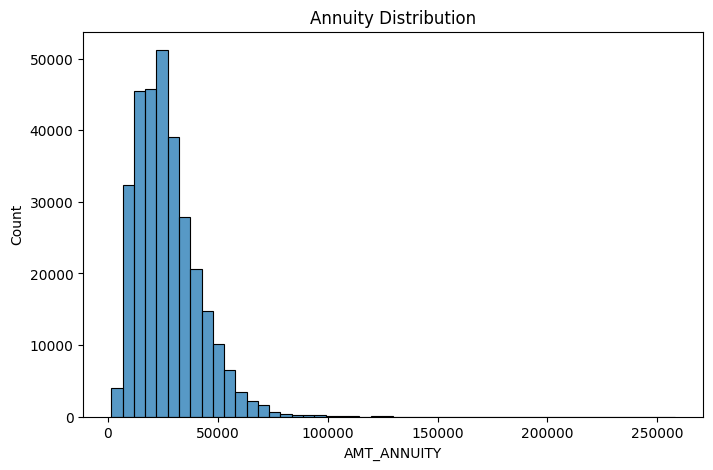

In [10]:
plt.figure(figsize=(8,5))
sns.histplot(df["AMT_ANNUITY"], bins=50)
plt.title("Annuity Distribution")
plt.show()


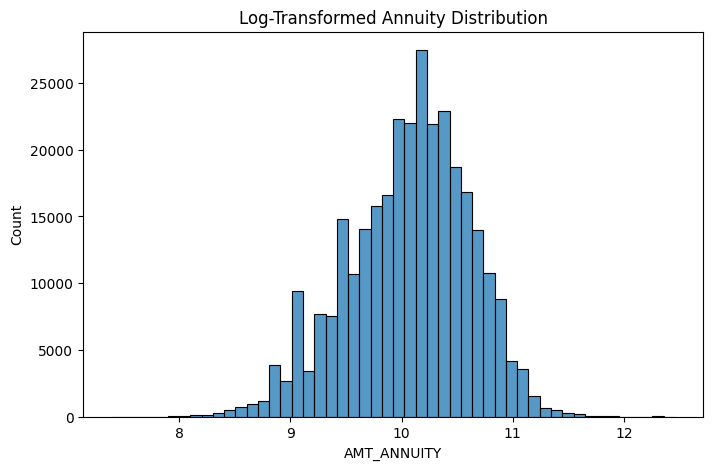

In [11]:
plt.figure(figsize=(8,5))
sns.histplot(np.log1p(df["AMT_ANNUITY"]), bins=50)
plt.title("Log-Transformed Annuity Distribution")
plt.show()


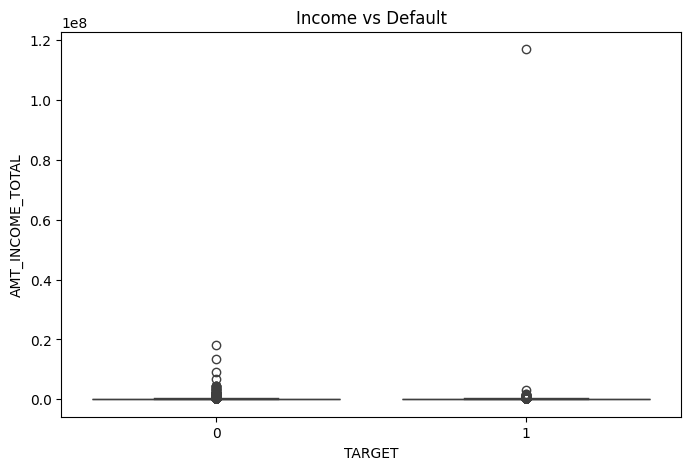

In [12]:
plt.figure(figsize=(8,5))
sns.boxplot(x="TARGET", y="AMT_INCOME_TOTAL", data=df)
plt.title("Income vs Default")
plt.show()


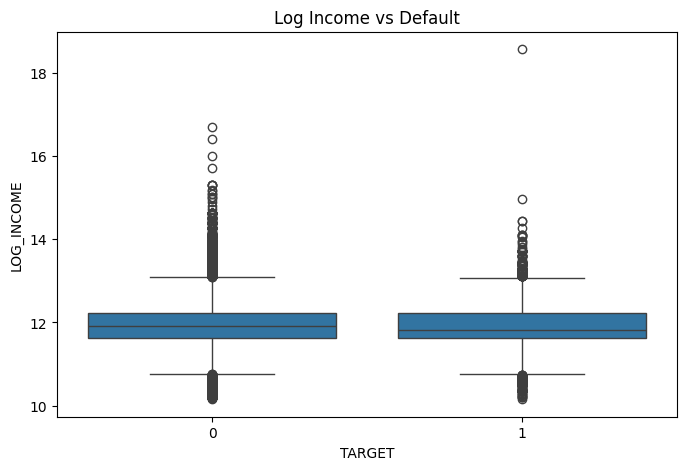

In [13]:
df["LOG_INCOME"] = np.log1p(df["AMT_INCOME_TOTAL"])

plt.figure(figsize=(8,5))
sns.boxplot(x="TARGET", y="LOG_INCOME", data=df)
plt.title("Log Income vs Default")
plt.show()



In [14]:
missing_percent = df.isnull().mean() * 100
missing_percent = missing_percent.sort_values(ascending=False)

missing_percent.head(20)


COMMONAREA_MEDI             69.872297
COMMONAREA_MODE             69.872297
COMMONAREA_AVG              69.872297
NONLIVINGAPARTMENTS_MEDI    69.432963
NONLIVINGAPARTMENTS_MODE    69.432963
NONLIVINGAPARTMENTS_AVG     69.432963
FONDKAPREMONT_MODE          68.386172
LIVINGAPARTMENTS_MEDI       68.354953
LIVINGAPARTMENTS_MODE       68.354953
LIVINGAPARTMENTS_AVG        68.354953
FLOORSMIN_MEDI              67.848630
FLOORSMIN_MODE              67.848630
FLOORSMIN_AVG               67.848630
YEARS_BUILD_AVG             66.497784
YEARS_BUILD_MEDI            66.497784
YEARS_BUILD_MODE            66.497784
OWN_CAR_AGE                 65.990810
LANDAREA_MODE               59.376738
LANDAREA_AVG                59.376738
LANDAREA_MEDI               59.376738
dtype: float64

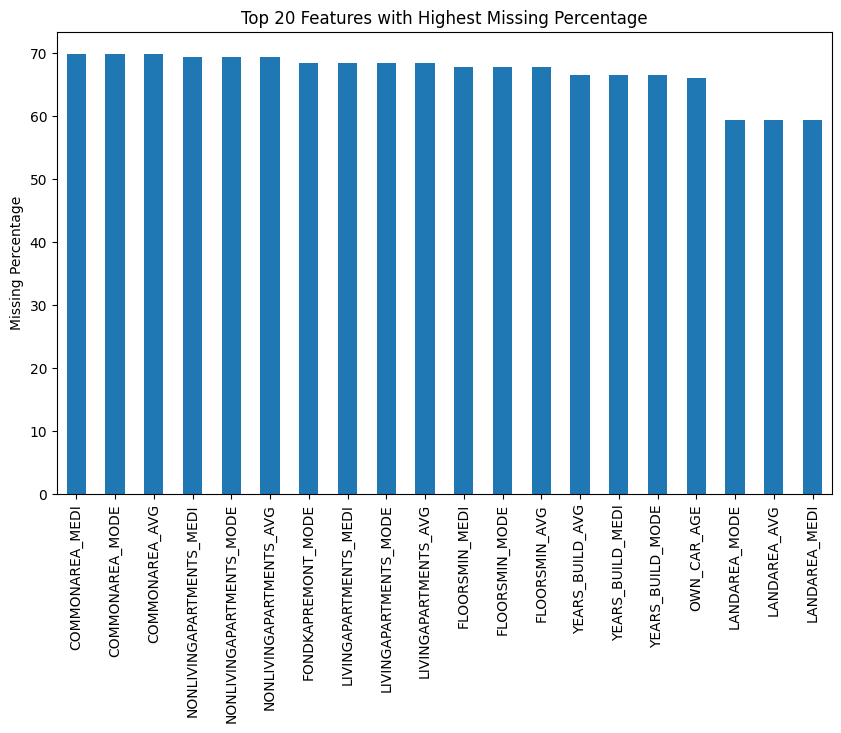

In [15]:
plt.figure(figsize=(10,6))
missing_percent.head(20).plot(kind='bar')
plt.title("Top 20 Features with Highest Missing Percentage")
plt.ylabel("Missing Percentage")
plt.show()


In [16]:
corr = df.corr(numeric_only=True)

target_corr = corr["TARGET"].sort_values(ascending=False)

target_corr.head(15)


TARGET                         1.000000
DAYS_BIRTH                     0.078239
REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
DAYS_LAST_PHONE_CHANGE         0.055218
DAYS_ID_PUBLISH                0.051457
REG_CITY_NOT_WORK_CITY         0.050994
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_DOCUMENT_3                0.044346
DAYS_REGISTRATION              0.041975
OWN_CAR_AGE                    0.037612
LIVE_CITY_NOT_WORK_CITY        0.032518
DEF_30_CNT_SOCIAL_CIRCLE       0.032248
DEF_60_CNT_SOCIAL_CIRCLE       0.031276
Name: TARGET, dtype: float64

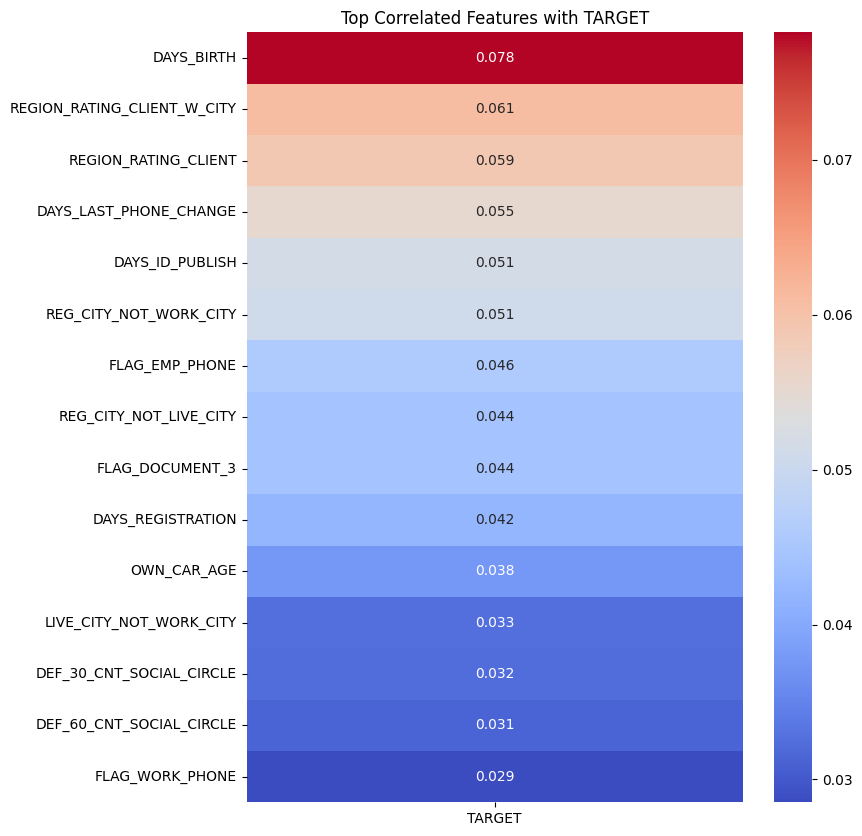

In [17]:
plt.figure(figsize=(8,10))

top_features = target_corr[1:16]  # exclude TARGET itself
sns.heatmap(top_features.to_frame(), annot=True, cmap="coolwarm")

plt.title("Top Correlated Features with TARGET")
plt.show()


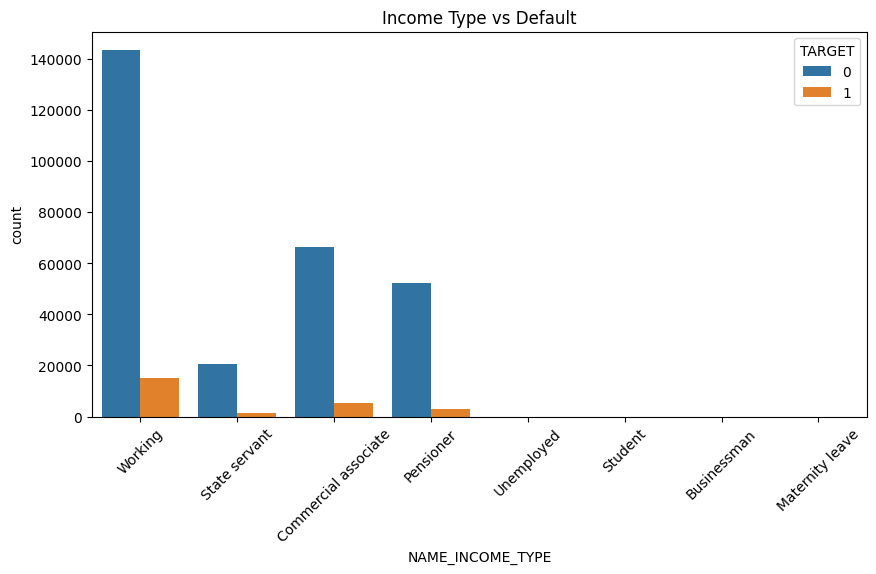

In [18]:
plt.figure(figsize=(10,5))
sns.countplot(x="NAME_INCOME_TYPE", hue="TARGET", data=df)
plt.xticks(rotation=45)
plt.title("Income Type vs Default")
plt.show()


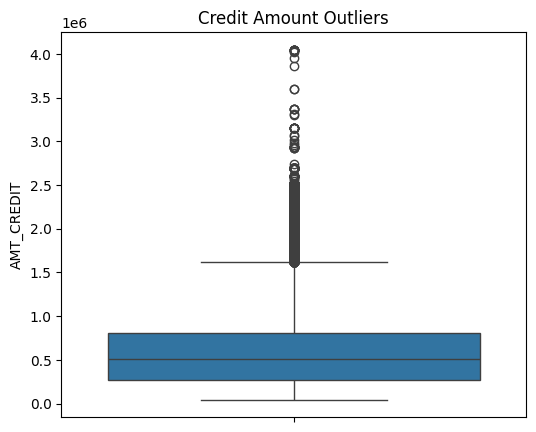

In [19]:
plt.figure(figsize=(6,5))
sns.boxplot(y=df["AMT_CREDIT"])
plt.title("Credit Amount Outliers")
plt.show()
